Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
MAX_PRICE 175.11
TRAIN (1443, 2)
TEST (300, 2)
TRAIN X (1383, 60, 2)
TRAIN Y (1383, 2)
LOSS: square  OPT: adam
DataSet X (1383, 60, 2)
DataSet Y (1383, 2)
DataSet num_examples 1383
Step 1: Acc= 0.177803, LR= 0.100000
Validation: 0.099043
Step 100: Acc= 0.000644, LR= 0.100000
Validation: 0.000377
Step 200: Acc= 0.000207, LR= 0.097000
Validation: 0.000315
Step 300: Acc= 0.000093, LR= 0.097000
Validation: 0.000270
Step 400: Acc= 0.000129, LR= 0.094090
Validation: 0.000224
Step 500: Acc= 0.000172, LR= 0.094090
Validation: 0.000221
Step 600: Acc= 0.000117, LR= 0.091267
Validation: 0.000241
Step 700: Acc= 0.000164, LR= 0.091267
Validation: 0.000251
Step 800: Acc= 0.000059, LR= 0.088529
Validation: 0.000185
Step 900: Acc= 0.000207, LR= 0.088529
Validation: 0.000180
Step 1000: Acc= 0.000196, LR= 0.085873
Validation: 0.000206
Test: 0.004753


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


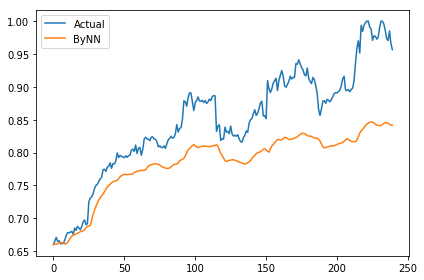

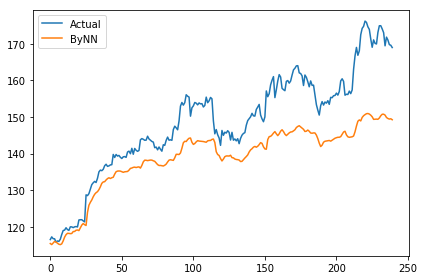

In [2]:
import numpy as np
import pandas as pd
import DATA
import LSTM
import PLOT

'''
2차원 데이타의 시계열 LSTM 학습/테스트
'''


def MinMaxScaler(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data, 0) - np.min(data, 0)
  # noise term prevents the zero division
  return numerator / (denominator + 1e-7)


def lstm_stock(fname):
  df = pd.read_csv(fname, header=0)
  print(df.columns)
  MAX_PRICE = df.Open.max()
  print('MAX_PRICE', MAX_PRICE)
  df = df[df.Open != 0][['Open', 'Close']]
  df.Open = df.Open / MAX_PRICE
  df.Close = df.Close / MAX_PRICE
  xy = df.as_matrix()
  #xy = MinMaxScaler(xy)
  
  train, validation, test = DATA.split_data(xy)
  WINDOWSIZE = 60
  train_x, train_y = DATA.getSeriesData(train, WINDOWSIZE, elementdim=2)
  valid_x, valid_y = DATA.getSeriesData(validation, WINDOWSIZE, elementdim=2)
  test_x, test_y = DATA.getSeriesData(test, WINDOWSIZE, elementdim=2)
  
  print('TRAIN', train.shape)
  print('TEST', test.shape)
  print('TRAIN X', train_x.shape)
  print('TRAIN Y', train_y.shape)
  
  
  lstm = LSTM.LSTM(2, WINDOWSIZE, 2, 2, loss='square', opt='adam')
  lstm.set_validation_data(valid_x, valid_y, valid_stop=0.0001)
  lstm.run(train_x, train_y, batch_size=int(train_x.shape[0] / 20), epochs=1000)
  lstm.do_test(test_x, test_y)
  predict_y = lstm.predict(test_x)
  chart = PLOT.LineChart()
  chart.line(test_y[:, 0], 'Actual')
  chart.line(predict_y[:, 0], 'ByNN')
  chart.show()
  
  chart = PLOT.LineChart()
  chart.line(test_y[:, 1] * MAX_PRICE, 'Actual')
  chart.line(predict_y[:, 1] * MAX_PRICE, 'ByNN')
  chart.show()
  


if __name__ == '__main__':
  lstm_stock('apple.csv')

